<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 7</h1>

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow import keras
from keras.datasets import cifar10
from tensorflow.keras import layers, activations

from keras.layers import Input, Flatten, Dense, Rescaling, MaxPooling2D, Conv2D, Dropout

2025-06-29 19:38:58.695528: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-29 19:38:59.563934: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-29 19:39:00.204981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751218740.726886   25087 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751218740.893483   25087 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751218742.123714   25087 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - CNN classifier</h1>

L'obiettivo di questo esercizio è la costruzione di un semplice ***CNN classifier***, ossia una rete neurale particolarmente efficace per l'elaborazione di dati strutturati in griglie, come per esempio le immagini. Una CNN è caratterizzata da una struttura articolata, dato che solitamente presenta:

- **layer convoluzionali:** applicano dei filtri che scansionano l'immagine e servono ad estrarre caratteristiche locali

- **pooling layer:** riduce la dimensione dell'immagine, mantenendo tuttavia le caratteristiche principali della stessa. Questo processo rende la rete più efficiente e robusta

- **fully connected layers:** prendono come input le caratteristiche estratte nella fase di convoluzione e fanno la classificazione finale

Dimensione training data: (50000, 32, 32, 3)
Dimensione training label: (50000, 1)

Dimensione validation data: (10000, 32, 32, 3)
Dimensione validation label: (10000, 1)


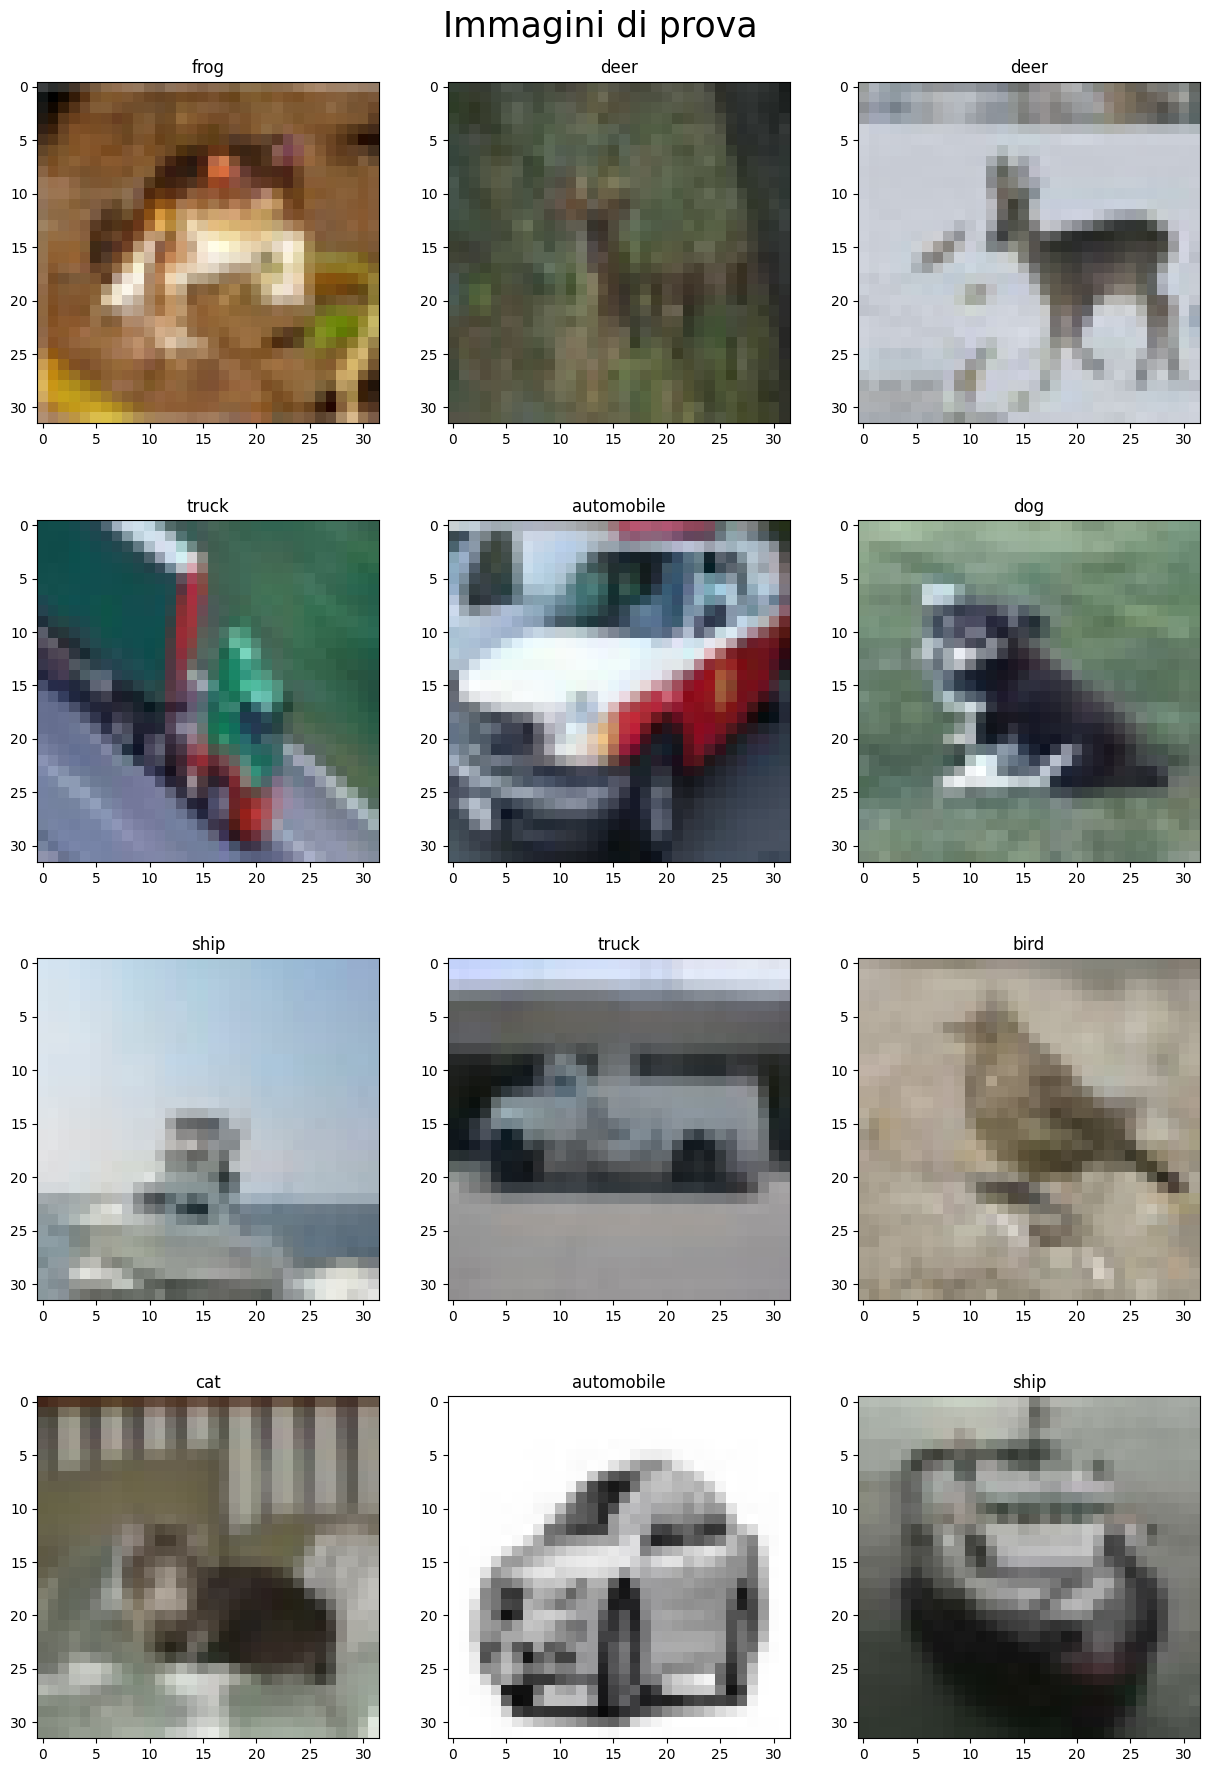

In [ ]:
def printImg(imTr, clTr, classes):
    # Funzione per stampare alcune immagini di prova del dataset
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax[i][j].imshow(imTr[50*i+10*j])
            ax[i][j].set_title(classes[clTr[50*i+10*j, 0]])

    fig.suptitle("Immagini di prova", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()


# Ci poniamo di risolvere un problema di classificazione e questo vuol dire che avremo a 
# che fare con delle immagini. In primo luogo dobbiamo caricare il dataset in modo da poterlo
# analizzare. Utilizziamo il dataset cifar, che possiamo direttamente importare da keras. 
# Questo dataset contiene 60mila immagini a bassa definizione contenenti 10 classi di oggetti, ossia
# ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']. Il 
# dataset è diviso in due: 50mila immagini per la fase di allenamento della rete e 10mila immagini per
# quella di validation
(imTr, clTr), (imVal, clVal) = cifar10.load_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# Studio la dimensione dei  vari dataset scaricati e stampo alcune immaigni di prova
print("Dimensione training data:", imTr.shape)
print("Dimensione training label:", clTr.shape)
print("\nDimensione validation data:", imVal.shape)
print("Dimensione validation label:", clVal.shape)

/home/filippo/.local/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25


2025-06-29 13:07:51.521092: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 153600000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.2730 - loss: 1.9702 - val_accuracy: 0.3543 - val_loss: 1.7606
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3748 - loss: 1.7274 - val_accuracy: 0.4161 - val_loss: 1.6359
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4008 - loss: 1.6585 - val_accuracy: 0.4231 - val_loss: 1.6269
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.4155 - loss: 1.6173 - val_accuracy: 0.4234 - val_loss: 1.6212
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4301 - loss: 1.5833 - val_accuracy: 0.4431 - val_loss: 1.5722
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4332 - loss: 1.5730 - val_accuracy: 0.4309 - val_loss: 1.5882
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4462 - loss: 1.5451 - val_accuracy: 0.4151 - val_loss: 1.6273
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.4422 - loss: 1.54

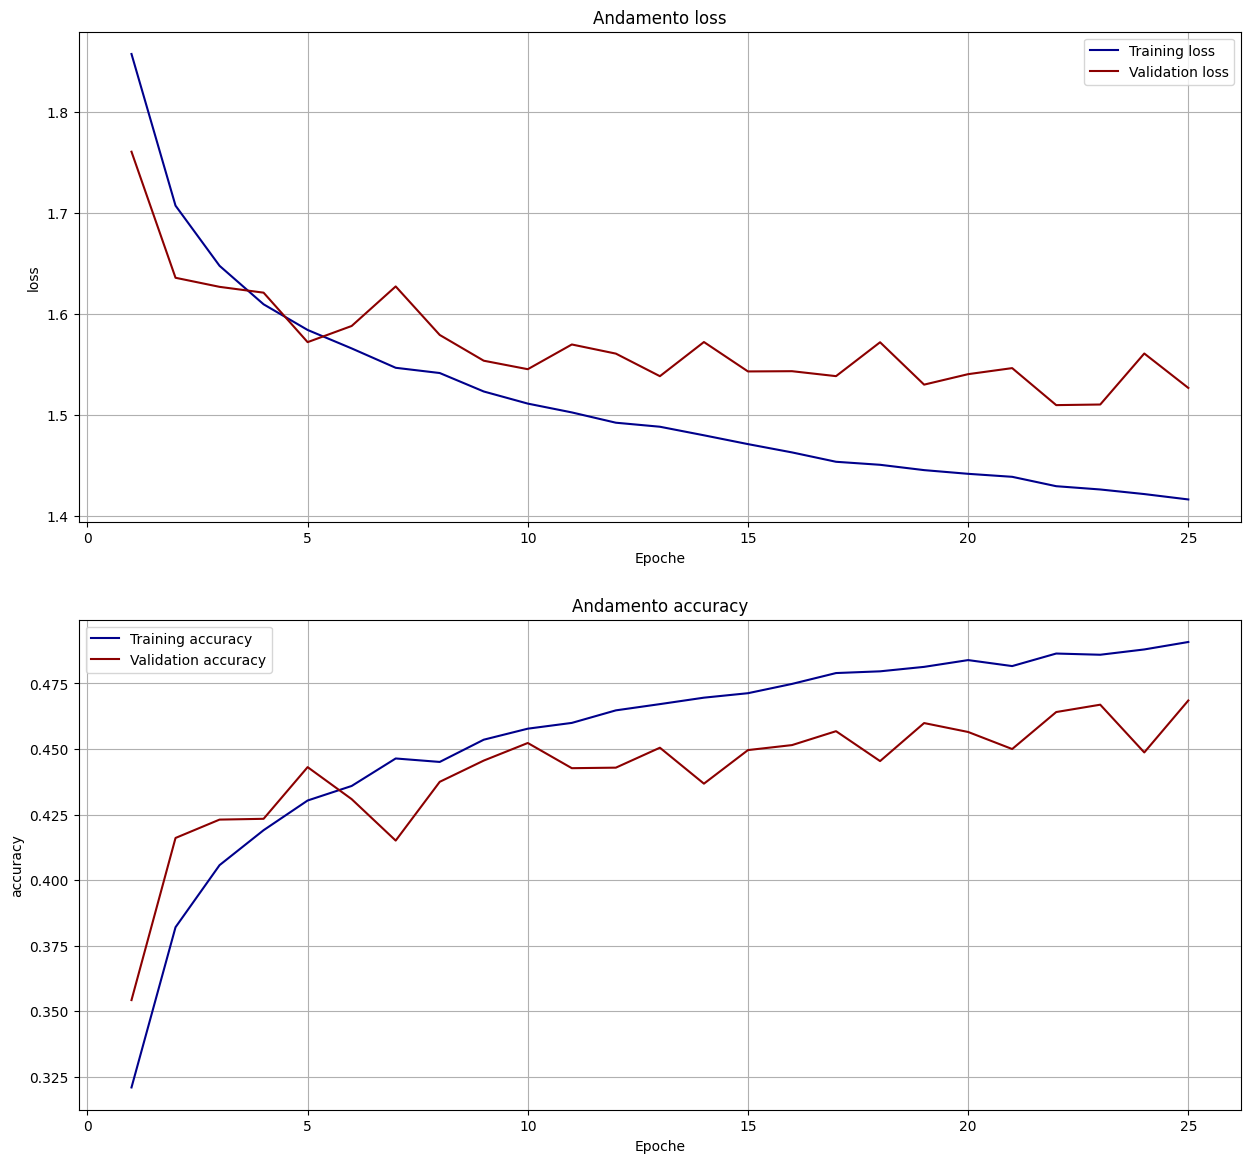

In [19]:
def plotTrInfo(hist):
    # Funzione per graficare l'evoluzione di loss ed accuracy in fase di allenamento
    fig, ax = plt.subplots(2, 1, figsize=(15,14))

    dim = len(hist.history['loss'])
    lab = ['loss', 'accuracy']

    for i, l in enumerate(lab):
        ax[i].plot(np.linspace(1, dim, dim), hist.history[l], color = 'darkblue', label = "Training " + l)
        ax[i].plot(np.linspace(1, dim, dim), hist.history['val_'+l], color = 'darkred', label = "Validation " + l)
        ax[i].set_title("Andamento " + l)
        ax[i].set_xlabel("Epoche")
        ax[i].set_ylabel(l)

        ax[i].legend(loc="best")
        ax[i].grid(True)
    plt.show()


def builMod(imH, imW, numcl):
    # Funzione per costruire un classificatore che non presenta alcun layer convoluzionale. 
    # Ci immaginiamo che il modello abbia delle performance abbastanza scarse, perchè non sfrutta 
    # alcuna caratteristica locale per la classificazione

    model = keras.Sequential()

    model.add(Rescaling(1./255, input_shape=(imH, imW, 3)))
    model.add(Flatten())

    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(numcl, activation = 'softmax'))

    return model


# Costruzione del modello ed allenamento della rete
model = builMod(32, 32, 10)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(imTr, clTr, epochs=25, validation_data=(imVal, clVal))
plotTrInfo(hist)

Epoch 1/25


2025-06-29 14:26:28.142875: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 153600000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 191s 118ms/step - accuracy: 0.3675 - loss: 1.7171 - val_accuracy: 0.5548 - val_loss: 1.2382
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.5784 - loss: 1.1859 - val_accuracy: 0.6004 - val_loss: 1.1063
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6352 - loss: 1.0298 - val_accuracy: 0.6347 - val_loss: 1.0270
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6729 - loss: 0.9318 - val_accuracy: 0.6657 - val_loss: 0.9595
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6954 - loss: 0.8653 - val_accuracy: 0.6635 - val_loss: 0.9860
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7142 - loss: 0.8050 - val_accuracy: 0.6808 - val_loss: 0.9178
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7423 - loss: 0.7347 - val_accuracy: 0.6731 - val_loss: 0.9700
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7577 - loss: 0.

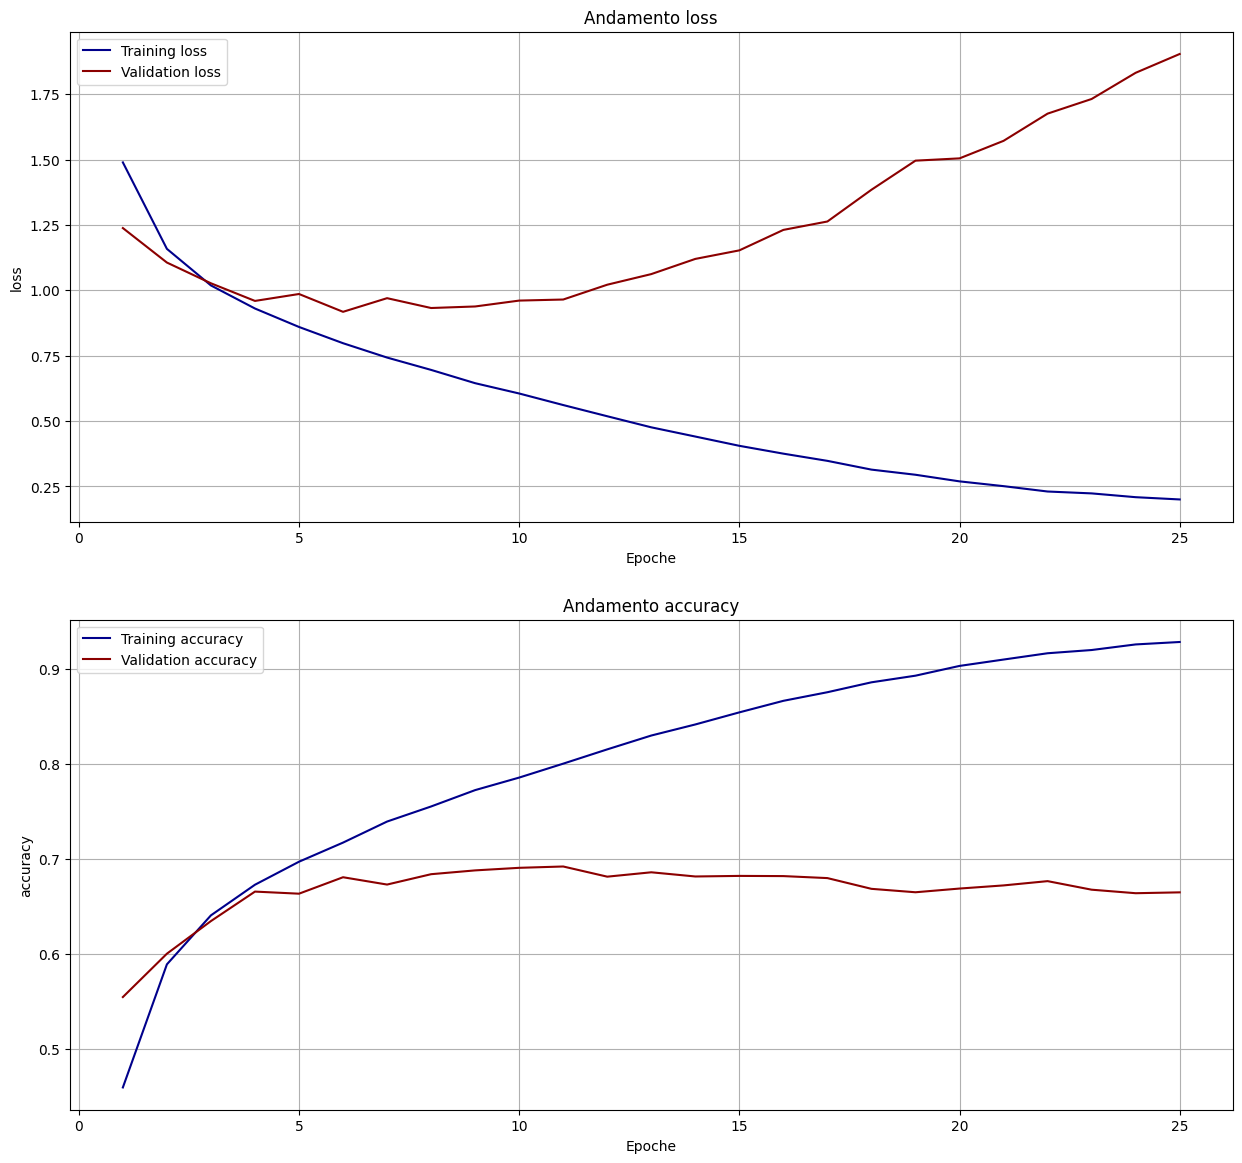

In [23]:
def plotTrInfo(hist):
    # Funzione per graficare l'evoluzione di loss ed accuracy in fase di allenamento
    fig, ax = plt.subplots(2, 1, figsize=(15,14))

    dim = len(hist.history['loss'])
    lab = ['loss', 'accuracy']

    for i, l in enumerate(lab):
        ax[i].plot(np.linspace(1, dim, dim), hist.history[l], color = 'darkblue', label = "Training " + l)
        ax[i].plot(np.linspace(1, dim, dim), hist.history['val_'+l], color = 'darkred', label = "Validation " + l)
        ax[i].set_title("Andamento " + l)
        ax[i].set_xlabel("Epoche")
        ax[i].set_ylabel(l)

        ax[i].legend(loc="best")
        ax[i].grid(True)
    plt.show()

def builMod(imH, imW, numcl):
    # Funzione per costruire il modello in questione. 

    model = keras.Sequential()
    # In primo luogo è necessario normalizzare le immagini fornite come input al modello e per 
    # questo motivo dividiamo il tutto per 255 ossia il massimo valore che può avere un pixel secondo 
    # la codifica RGB. Inoltre le immagini di input sono die tensori tridimensionali perchè per 
    # ogni pixel è necessario specificare la quantità di rosso, verde e blu.
    model.add(Rescaling(1./255, input_shape=(imH, imW, 3)))
    # Per i layer convoluzionali utilizzaimo Conv2D, che crea un kernel convoluzionale che è in 
    # convoluzione con l'input su uno spazio 2D (larghezza e lunghezza). In particolare specifichiamo:
    #
    # filters --> il numero di filtri da applicare. Ogni filtro si dedica all'individuazione di 
    # una caratteristica differente, quindi "più filtri == più caratteristiche 
    # imparate"
    #
    # kernel_size --> specifica le dimensioni del filtro, quindi larghezza ed altezza
    #
    # Si possono anche specificare altri parametri quali la funzione d'attivazione
    model.add(Conv2D(16, (3, 3), activation = 'relu'))
    # Dopo uno strato convozionale introduciamo un layer di pooling, il cui scopo è quello di 
    # rendere più efficiente la rete neurale, dato che la dimensione delle immagini vinee ridotta, 
    # mantenendo tuttavia le caratteristiche principali. Questo vuol dire che le successive analisi 
    # saranno più immmediate. Un parametro importante da segnalare è il "pool_size", che definisce 
    # le dimensioni della finestra di campionamento
    model.add(MaxPooling2D((2, 2)))
    # Per rendere lo studio dell'immagine più accurato inserisco altri layer convoluzionali e di 
    # pooling, in modo da caratterizzare altre features
    model.add(Conv2D(32, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    # Inizia ora la parte fully connected per la classificazione delle immagini
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(numcl, activation = 'softmax'))
    
    return model


# Costruzione del modello ed allenamento della rete
model = builMod(32, 32, 10)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(imTr, clTr, epochs=25, validation_data=(imVal, clVal))
plotTrInfo(hist)

<h1 style="color: blue; font-size:50px;"> Esercizio 2 - Localization / Classification</h1>

In questo esercizio ci proponiamo di risolvere un problema di classificazione e localizzazione simultanea utilizzando una rete neurale convoluzionale (CNN) costruita con l’API funzionale di Keras. I dati forniti consistono in immagini sintetiche di dimensione 75x75 pixel, ciascuna contenente una singola cifra MNIST (28x28) posizionata in modo casuale all'interno dell'immagine. Per ogni immagine, abbiamo a disposizione:

- Un'etichetta (da 0 a 9) che identifica la cifra contenuta nell'immagine.

- Una bounding box (xmin, ymin, xmax, ymax) che racchiude la posizione della cifra.

<br>
<br>
Il nostro obiettivo è costruire un modello in grado di:

- Classificare la cifra presente nell'immagine.

- Localizzare la cifra, cioè predire la bounding box che la racchiude.

<br>
<br>
Per affrontare questo compito, sfrutteremo le potenzialità delle reti neurali multitask, che consentono di condividere una parte comune del modello (in questo caso un feature extractor convoluzionale) per poi biforcarsi in due rami:

- Un classificatore, che prevede una delle 10 classi MNIST con funzione di attivazione softmax e loss di tipo categorical crossentropy.

- Un regressore, che prevede le 4 coordinate della bounding box con attivazione lineare e loss di tipo Mean Squared Error (MSE).

Dimensione training data: (60000, 75, 75, 1)
Dimensione training label: (60000, 10)
Dimensione training boxes: (60000, 4)

Dimensione validation data: (10000, 75, 75, 1)
Dimensione validation label: (10000, 10)
Dimensione validation boxes: (10000, 4)


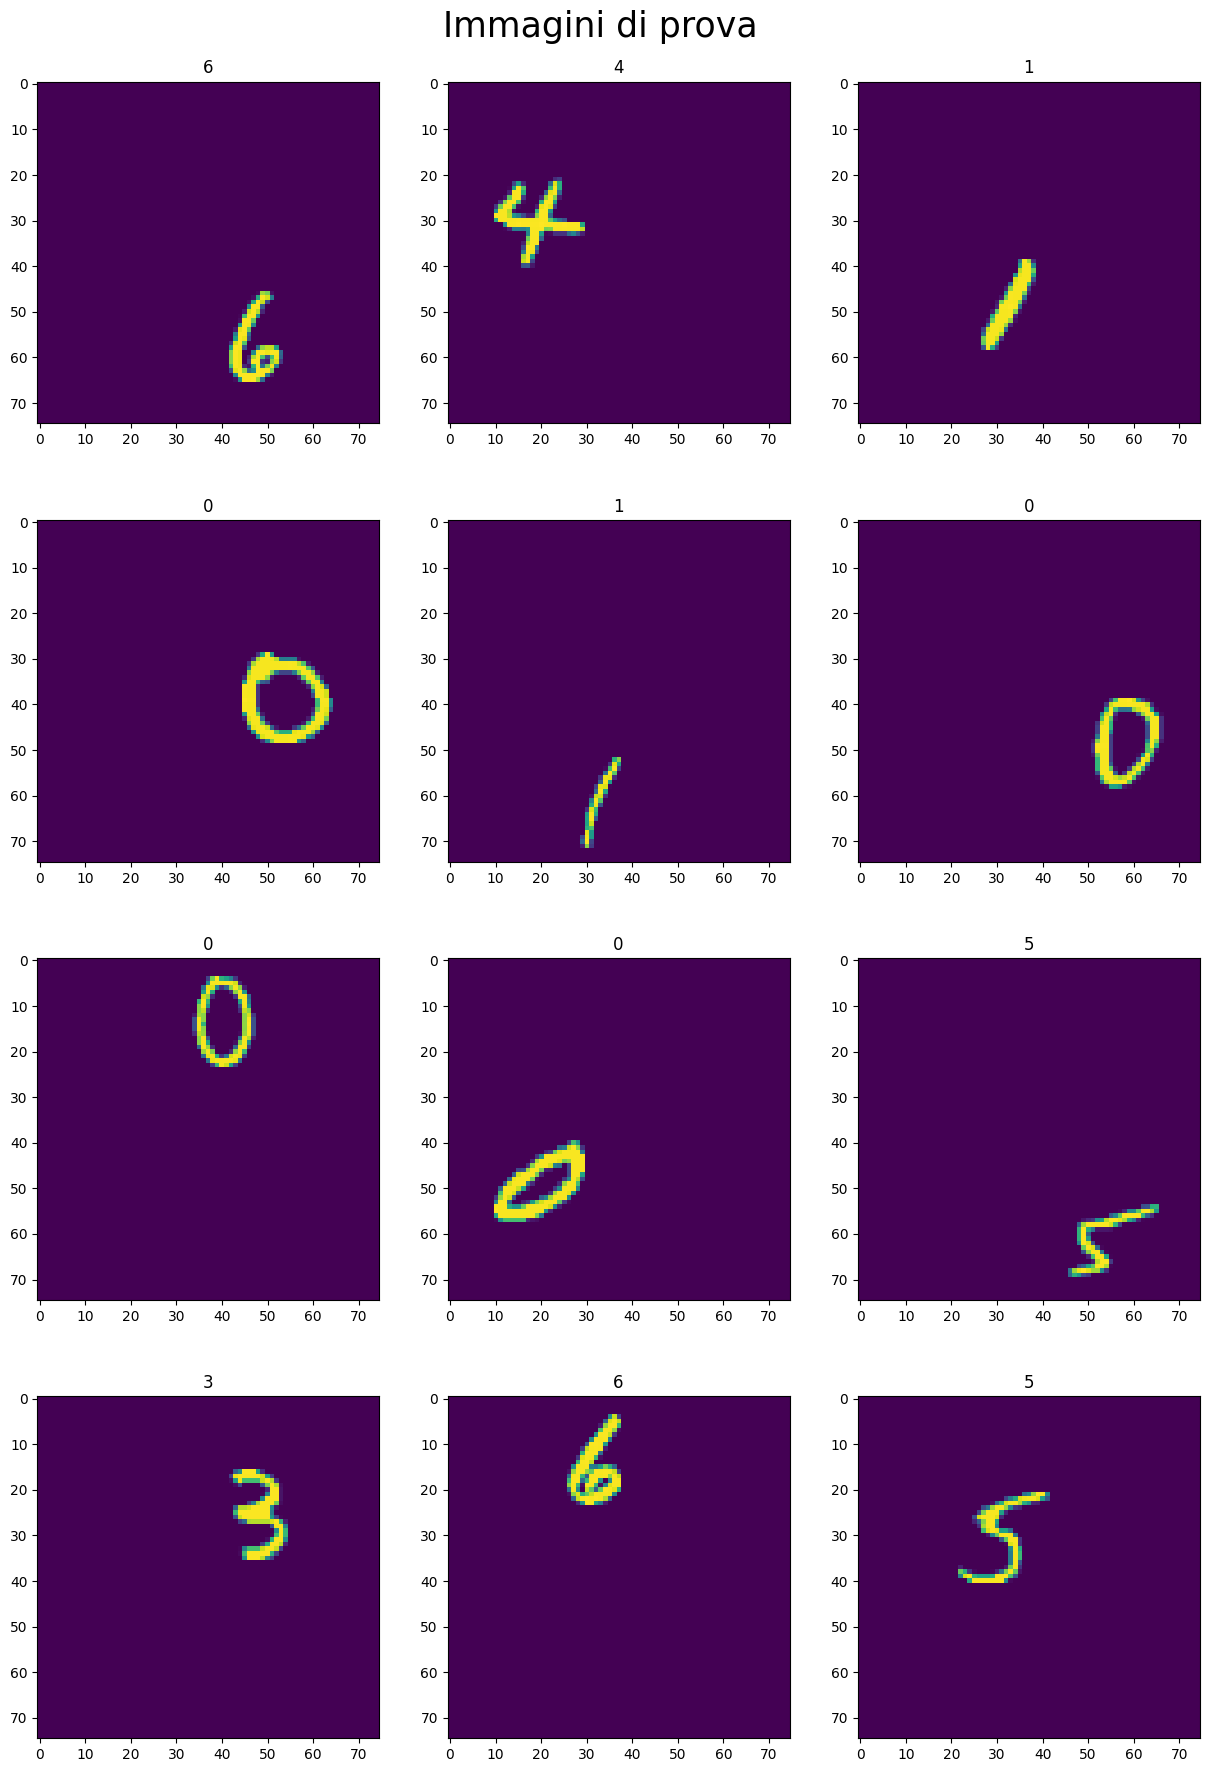

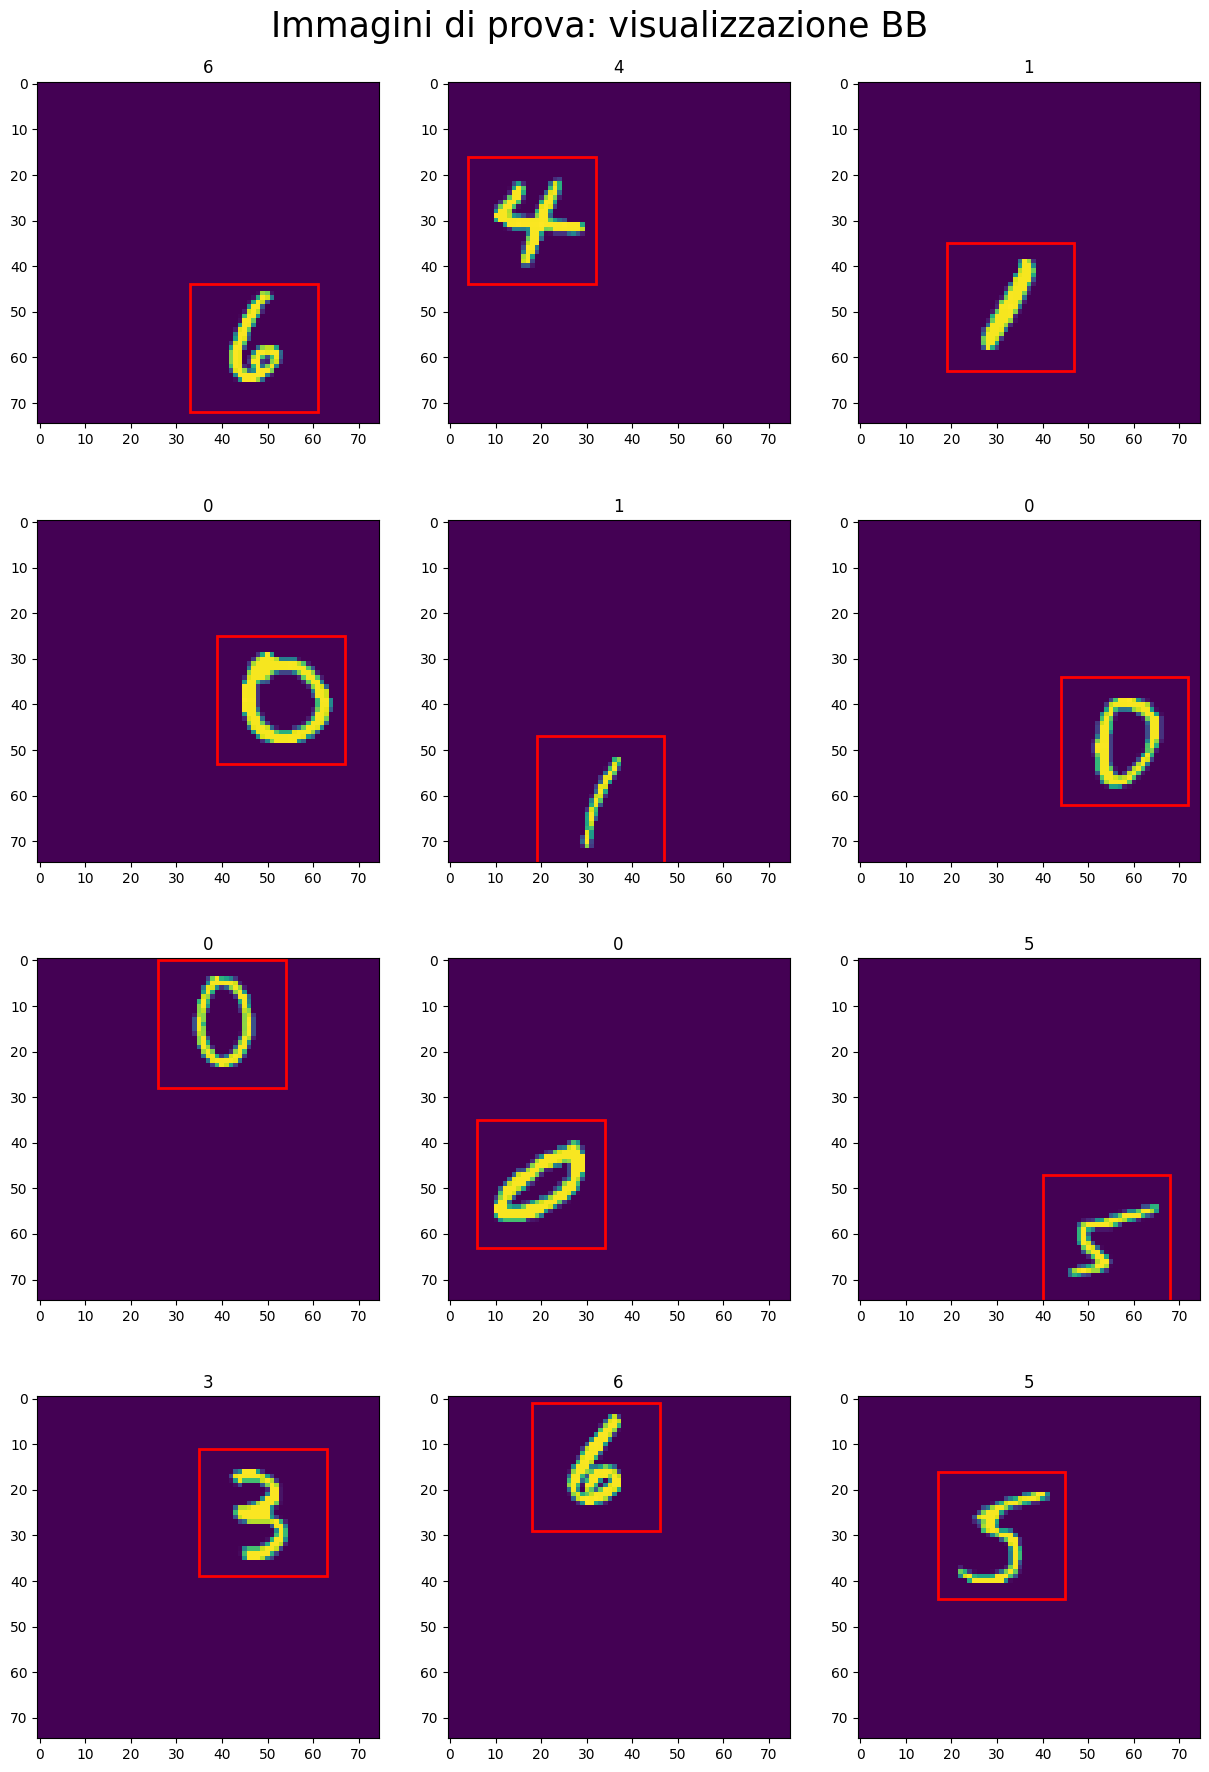

In [2]:
def printImg(trImg, trLab):
    # Funzione per stampare alcune immagini di prova del dataset
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax[i][j].imshow(trImg[50*i+10*j])
            ax[i][j].set_title(np.argmax(np.array(trLab[50*i+10*j, :])))

    fig.suptitle("Immagini di prova", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()

def printImgBB(trImg, trLab, trBox):
    # Funzione per stampare alcune immagini di prova del dataset
    fig, ax = plt.subplots(4, 3, figsize = (15, 20))
    for i in range(0, 4):
        for j in range(0, 3):
            ax[i][j].imshow(trImg[50*i+10*j])
            ax[i][j].set_title(np.argmax(np.array(trLab[50*i+10*j, :])))

            # Aggiungo il rettangolo per evidenziare dove si trovi l'oggetto
            width = trBox[50*i+10*j, 2] - trBox[50*i+10*j, 0]
            height = trBox[50*i+10*j, 3] - trBox[50*i+10*j, 1]

            rect = patches.Rectangle(
                (75*trBox[50*i+10*j, 0], 75*trBox[50*i+10*j, 1]), 75*width, 75*height,
                linewidth=2, edgecolor='red', facecolor='none'
            )
            ax[i][j].add_patch(rect)

    fig.suptitle("Immagini di prova: visualizzazione BB", fontsize = 25)
    plt.subplots_adjust(top=0.95)
    plt.show()


# Carico i dati da file. Dato che sono file binari non è possibile utilizzare la funzione loadtxt, ma si deve 
# invece ripiegare sulla funzione load e basta. In particolare abbiamo sei file, che sono divisibili in tre categorie:
#
#       1 --> "training_images.npy" & "validation_images.npy" contengono le immagini
#
#       2 --> "training_labels.npy" & "validation_labels.npy" contengono le labels per ogni immagine
#
#       3 --> "training_boxes.npy" & "validation_boxes.npy" le quattro coordinate dei bounding box, ossia (xmin, ymin, xmax, ymax)

trImg = np.load("Dati/Esercitazione7/training_images.npy",  mmap_mode='r')
trLab = np.load("Dati/Esercitazione7/training_labels.npy",  mmap_mode='r')
trBox = np.load("Dati/Esercitazione7/training_boxes.npy",  mmap_mode='r')

valImg = np.load("Dati/Esercitazione7/validation_images.npy",  mmap_mode='r')
valLab = np.load("Dati/Esercitazione7/validation_labels.npy",  mmap_mode='r')
valBox = np.load("Dati/Esercitazione7/validation_boxes.npy",  mmap_mode='r')

# Studio la dimensione degli array creati mediante loading da file
print("Dimensione training data:", trImg.shape)
print("Dimensione training label:", trLab.shape)
print("Dimensione training boxes:", trBox.shape)

print("\nDimensione validation data:", valImg.shape)
print("Dimensione validation label:", valLab.shape)
print("Dimensione validation boxes:", valBox.shape)

# Stampo a video esempi
printImg(trImg, trLab)
printImgBB(trImg, trLab, trBox)

In [3]:
print("ciao")

ciao


In [4]:
# In questo caso non siamo interessati a risolvere un problema di sola classificazione, poichè 
# vogliamo anche che la nostra rete neurale localizzi la feature e produca come output una coppia
# label e bounding box. Per far sì che il nostro modello possa adattarsi alla risoluzione di un tale 
# compito, sfrutiamo il fatto che in keras è possibile specificare sia l'input che i molteplici 
# output del modello, consentendo una maggior adattabilità della rete. Implementiamo in primo luogo 
# tre funzioni "d'appoggio", che saranno chiamate dal metodo vero e proprio per la costruzione del modello

def featureExtractor(inputs):
    # Questa parte della rete è una CNN, ossia una rete convoluzionale per l'identificazione delle 
    # caratteristiche principali, seguita da un layer di flattening ed uno denso. Questa parte del NN 
    # è comune ad entrambi gli end-points
        
    x = Conv2D(16, (3, 3), activation = 'relu')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation = 'relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation = 'relu')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation = 'relu')(x)
    
    return x

def classifier(inputs):
    # Questa parte del NN servirà per effettuare la classificazione dell'immagine presa in analisi 
    # e per questo motivo il layer che svolgerà questo compito sarà costituito da 10 nodi (tanti quante 
    # le classi) con softmax come funzione d'attivazione
    return Dense(10, activation = 'softmax', name = 'classifier')(inputs)

def regressor(inputs):
    # Questa parte del NN servirà per riportare come output la bounding-box contenente la feature identificata
    return Dense(4, name = 'bb')(inputs)

def buildMod():
    # Questa è la funzione di costruzione del modello vera e propria, ossia quella che unisce insieme i pezzi 
    # e produce le guess desiderate (ossia classe e bounding box)
    inputs = Input(shape=(75, 75, 1))
    x = featureExtractor(inputs)
    
    model = tf.keras.Model(inputs = inputs, outputs = [classifier(x), regressor(x)])
    return model



# Una volta costruito il modello, lo compilo specificando optimizer e tipo di loss
# function, pochè presentando una struttura articolata è necessario usare quanto di più
# adeguato per le varie task che deve compiere il modello
model = buildMod()
model.compile(
    optimizer = 'adam',

    loss = {
        'classifier': 'categorical_crossentropy',            # Perchè problema di classificazione con hot-one encoding
        'bb': 'mse'                                          # Perchè devo studiare quanto adeguata la bb
    },

    metrics = {
        'classifier': 'acc',                                 
        'bb': 'mse'                                 
    }
)

# Per la procedura di fitting vanno specificate sia le label corrette che le bb corrette
hist = model.fit(trImg, (trLab, trBox), validation_data=(valImg,(valLab, valBox)), epochs = 10)

2025-06-29 19:39:31.504526: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-06-29 19:39:41.741571: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1350000000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - bb_loss: 0.0200 - bb_mse: 0.0200 - classifier_acc: 0.6221 - classifier_loss: 1.0442 - loss: 1.0643

2025-06-29 19:48:18.411378: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 225000000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 530s 278ms/step - bb_loss: 0.0200 - bb_mse: 0.0200 - classifier_acc: 0.6222 - classifier_loss: 1.0440 - loss: 1.0640 - val_bb_loss: 0.0057 - val_bb_mse: 0.0057 - val_classifier_acc: 0.9527 - val_classifier_loss: 0.1500 - val_loss: 0.1558
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 478s 255ms/step - bb_loss: 0.0049 - bb_mse: 0.0049 - classifier_acc: 0.9568 - classifier_loss: 0.1404 - loss: 0.1453 - val_bb_loss: 0.0026 - val_bb_mse: 0.0026 - val_classifier_acc: 0.9638 - val_classifier_loss: 0.1175 - val_loss: 0.1202
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 475s 253ms/step - bb_loss: 0.0024 - bb_mse: 0.0024 - classifier_acc: 0.9756 - classifier_loss: 0.0753 - loss: 0.0777 - val_bb_loss: 0.0018 - val_bb_mse: 0.0018 - val_classifier_acc: 0.9691 - val_classifier_loss: 0.0948 - val_loss: 0.0966
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 485s 259ms/step - bb_loss: 0.0017 - bb_mse: 0.0017 - classifier_acc: 0.9840 - classifier_loss: 0.0481 - loss: 0.0498 - val_bb_los